<a href="https://colab.research.google.com/github/Raneem-Ali0/-Emotion-Recognition-/blob/main/Emotion_Recognition_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tweet Emotion Recognition: Natural Language Processing with TensorFlow

---

Dataset: [Tweet Emotion Dataset](https://github.com/dair-ai/emotion_dataset)

This is a starter notebook for the guided project [Tweet Emotion Recognition with TensorFlow](https://www.coursera.org/projects/tweet-emotion-tensorflow)

A complete version of this notebook is available in the course resources

---

## Task 1: Introduction

## Task 2: Setup and Imports

1. Installing Hugging Face's nlp package
2. Importing libraries

In [ ]:
!pip install nlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import nlp
import random


def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    
def show_confusion_matrix(y_true, y_pred, classes):
    from sklearn.metrics import confusion_matrix
    
    cm = confusion_matrix(y_true, y_pred, normalize='true')

    plt.figure(figsize=(8, 8))
    sp = plt.subplot(1, 1, 1)
    ctx = sp.matshow(cm)
    plt.xticks(list(range(0, 6)), labels=classes)
    plt.yticks(list(range(0, 6)), labels=classes)
    plt.colorbar(ctx)
    plt.show()

    
print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.8.2


## Task 3: Importing Data

1. Importing the Tweet Emotion dataset
2. Creating train, validation and test sets
3. Extracting tweets and labels from the examples

In [ ]:
data = nlp.load_dataset('emotion')

Using custom data configuration default


In [ ]:
data

{'test': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 2000),
 'train': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 16000),
 'validation': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 2000)}

In [ ]:
train = data['train']
val=data['validation']
test = data['test']

In [ ]:
def get_tweet (data):
  tweet = [x['text'] for x in data]
  label = [x['label'] for x in data ]
  return tweet , label

In [ ]:
tweet , label = get_tweet(train)

In [ ]:
tweet[1] , label[1]

('i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
 'sadness')

## Task 4: Tokenizer

1. Tokenizing the tweets

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer


In [ ]:
tok = Tokenizer(num_words= 10000 , oov_token = '<UNK>')
tok.fit_on_texts(tweet)

In [ ]:
tok.texts_to_sequences([tweet[0]])

[[2, 139, 3, 679]]

## Task 5: Padding and Truncating Sequences

1. Checking length of the tweets
2. Creating padded sequences

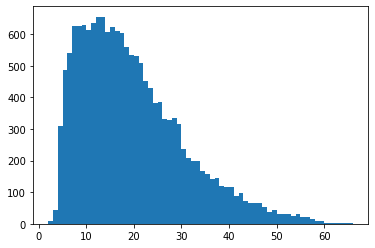

In [ ]:
length = [ len(t.split(' ')) for t in tweet ]
plt.hist(length , bins = len(set(length)))
plt.show()

In [ ]:
maxlen = 50 

minlen = 10

from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
from nlp.features import Sequence
def get_seq (token , tweet):
  seq = token.texts_to_sequences(tweet)
  padded = pad_sequences(sequences = seq , truncating='post', padding='post', maxlen=maxlen )
  return padded

In [ ]:
padded_train = get_seq(tok , tweet)

In [ ]:
padded_train[2]

array([  17, 3060,    7, 1149,    5,  286,    2,    3,  495,  438,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0], dtype=int32)

## Task 6: Preparing the Labels

1. Creating classes to index and index to classes dictionaries
2. Converting text labels to numeric labels

In [ ]:
classes = set(label)
print(classes)

{'sadness', 'fear', 'love', 'surprise', 'anger', 'joy'}


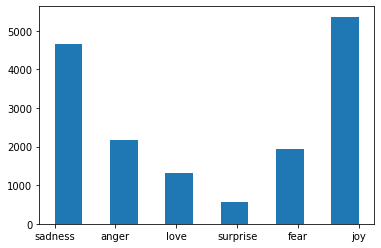

In [ ]:
plt.hist(label , bins = 11)
plt.show()

In [ ]:
Classes_to_index = dict((c,i) for i,c in enumerate(classes))
index_to_classes = dict((v,k) for k,v in Classes_to_index.items())

In [ ]:
Classes_to_index

{'anger': 4, 'fear': 1, 'joy': 5, 'love': 2, 'sadness': 0, 'surprise': 3}

In [ ]:
index_to_classes

{0: 'sadness', 1: 'fear', 2: 'love', 3: 'surprise', 4: 'anger', 5: 'joy'}

In [ ]:
names_to_ids = lambda label:np.array([Classes_to_index.get(x) for x in label])

In [ ]:
train_label = names_to_ids(label)
print(train_label[0])

0


## Task 7: Creating the Model

1. Creating the model
2. Compiling the model

In [ ]:
from typing import Optional
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Embedding(10000,16,input_length = maxlen),
                                    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20,return_sequences =  True)),
                                    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
                                    tf.keras.layers.Dense(6,activation='softmax')

    
   ] 
)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 50, 32)            320000    
                                                                 
 bidirectional_14 (Bidirecti  (None, 50, 40)           8480      
 onal)                                                           
                                                                 
 bidirectional_15 (Bidirecti  (None, 40)               9760      
 onal)                                                           
                                                                 
 dense_7 (Dense)             (None, 6)                 246       
                                                                 
Total params: 338,486
Trainable params: 338,486
Non-trainable params: 0
_________________________________________________________________


## Task 8: Training the Model

1. Preparing a validation set
2. Training the model

In [ ]:
val_tweet , val_label = get_tweet(val)
val_seq = get_seq(tok , val_tweet)
val_label = names_to_ids(val_label)

In [ ]:
val_tweet[0] , val_label[0]

('im feeling quite sad and sorry for myself but ill snap out of it soon', 0)

In [ ]:
h=model.fit(
    padded_train ,train_label,
    validation_data=(val_seq,val_label),
    epochs=20,
    callbacks=[
    
                  tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=2)
    ]
)

Epoch 1/20
500/500 [==============================] - 20s 20ms/step - loss: 1.3255 - accuracy: 0.4898 - val_loss: 0.9645 - val_accuracy: 0.6440
Epoch 2/20
500/500 [==============================] - 8s 17ms/step - loss: 0.7424 - accuracy: 0.7374 - val_loss: 0.6648 - val_accuracy: 0.7705
Epoch 3/20
500/500 [==============================] - 11s 23ms/step - loss: 0.4536 - accuracy: 0.8531 - val_loss: 0.5348 - val_accuracy: 0.8230
Epoch 4/20
500/500 [==============================] - 8s 17ms/step - loss: 0.2988 - accuracy: 0.9026 - val_loss: 0.4503 - val_accuracy: 0.8635
Epoch 5/20
500/500 [==============================] - 8s 16ms/step - loss: 0.2096 - accuracy: 0.9352 - val_loss: 0.4021 - val_accuracy: 0.8805
Epoch 6/20
500/500 [==============================] - 8s 16ms/step - loss: 0.1386 - accuracy: 0.9588 - val_loss: 0.3933 - val_accuracy: 0.8890
Epoch 7/20
500/500 [==============================] - 10s 20ms/step - loss: 0.1021 - accuracy: 0.9690 - val_loss: 0.4404 - val_accuracy: 0.8

## Task 9: Evaluating the Model

1. Visualizing training history
2. Prepraring a test set
3. A look at individual predictions on the test set
4. A look at all predictions on the test set

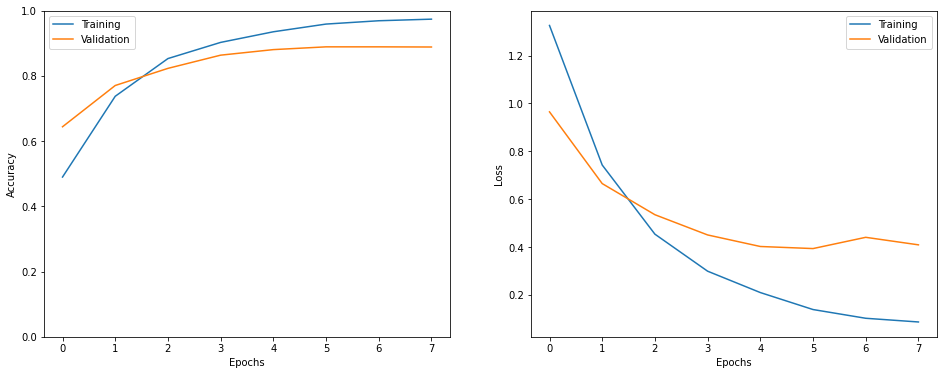

In [ ]:
show_history(h)

In [ ]:
test_tweet , test_label = get_tweet(test)
test_seq = get_seq(tok,test_tweet)
test_label= names_to_ids(test_label)


In [ ]:
_ = model.evaluate(test_seq,test_label)

63/63 [==============================] - 1s 9ms/step - loss: 0.3816 - accuracy: 0.8885


In [ ]:
i= random.randint(0,len(test_label)-1)
print('Sentence:', test_tweet[i])
print('Emotion',index_to_classes[test_label[i]])

p= model.predict(np.expand_dims(test_seq[i],axis=0))[0]

pred_class = index_to_classes[np.argmax(p).astype('uint8')]

print('presict : ', pred_class)

Sentence: i feel the need to compensate with only the most perfect jacket as a topper to cover where my boobs do not fulfill their duties
Emotion joy
presict :  joy


In [ ]:
preds = np.argmax(model.predict(test_seq), axis=1)

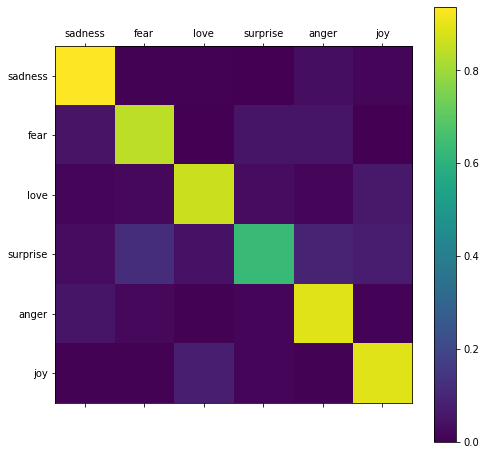

In [ ]:
show_confusion_matrix(test_label , preds , list(classes))